In [175]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [41]:
import numpy as np
import pandas as pd

In [42]:
import datetime as dt

In [43]:
# quick reveiw of date & Time
# Print a date object and a datetime object 
print(dt.date.today())
print(dt.date(2017, 1 ,31))

2020-01-16
2017-01-31


In [44]:
print(dt.datetime.utcnow())
print(dt.datetime(2017, 1, 31))

2020-01-17 00:08:07.038003
2017-01-31 00:00:00


In [45]:
# date 1 week ago from today
week_ago = dt.date.today() - dt.timedelta(days=7)
print(week_ago)

2020-01-09


In [46]:
# date 1 week ago from today
#month_ago = dt.date.today() - dt.timedelta(month=12)
#print(month_ago)

In [47]:
week_ago = dt.date.today() - dt.timedelta(days=7)
print(week_ago)

2020-01-09


# Reflect Tables into SQLAlchemy ORM

In [48]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy as db
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [49]:
#engine = create_engine("sqlite:///Resources/hawaii.sqlite")
#engine = create_engine("mysql://u:p@host/db", pool_size=10, max_overflow=20)
#engine = create_engine("sqlite:///SQL_ALCHEMY_Flask_Challenge/hawaii.sqlite")
engine = create_engine("sqlite:///hawaii.sqlite")
# engine = create_engine("sqlite:///../Resources/dow.sqlite", echo=False)

#https://docs.sqlalchemy.org/en/13/errors.html#error-e3q8)
# SQLAlchemy errors can roughly be separated into two categories, the programming-time error and the runtime error.
#Valid SQLite URL forms are:
#                             sqlite:///:memory: (or, sqlite://) as in:
#                                       engine = create_engine('sqlite:///:memory:', echo=True)
#                             sqlite:///relative/path/to/file.db
#                             sqlite:////absolute/path/to/file.db
#
# The return value of create_engine() is an instance of Engine, and it represents the core interface to the database,
# adapted through a dialect that handles the details of the database 
# and DBAPI in use. In this case the SQLite dialect will interpret instructions to the Python built-in sqlite3 module.

In [50]:

session = Session(bind=engine)

In [51]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [52]:
#   Should we not inspect the tables before we get Classes of database?
#inspector = inspect(engine)
#inspector.get_table_names()

In [53]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [54]:
# Save references to each table (whiic is defined as a class(es) in the DB: Base)
Measurement = Base.classes.measurement
Station = Base.classes.station


In [55]:
from sqlalchemy.orm import sessionmaker
#We’re now ready to start talking to the database. The ORM’s “handle” to the database is the Session. 
#When we first set up the application, at the same level as our create_engine() statement,
#we define a Session class which will serve as a factory for new Session objects:

In [56]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [57]:
engine.execute('SELECT * FROM Measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0, None),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0, None),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0, None),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0, None),
 (5, 'USC00519397', '2010-01-06', None, 73.0, None)]

In [58]:
# Query All Records in the the Database - Does same as above
#data = engine.execute("SELECT * FROM Measurement")
#for record in data:
#    print(record)
    

In [59]:
# Exploratory Climate Analysis
engine.execute('SELECT * FROM Station LIMIT 5').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

In [60]:
## Design a query to retrieve the last 12 days of precipitation data and plot the results
# Query Single Record in the the Database
# Note: This report is produced in Months in a different section, below.
data = engine.execute("SELECT * FROM Measurement where Date<=2020-01-01 limit 12;")
#data = engine.execute("SELECT * FROM Measurement where Date<=2020-01-01;")
for record in data:
    print(record)

(1, 'USC00519397', '2010-01-01', 0.08, 65.0, None)
(2, 'USC00519397', '2010-01-02', 0.0, 63.0, None)
(3, 'USC00519397', '2010-01-03', 0.0, 74.0, None)
(4, 'USC00519397', '2010-01-04', 0.0, 76.0, None)
(5, 'USC00519397', '2010-01-06', None, 73.0, None)
(6, 'USC00519397', '2010-01-07', 0.06, 70.0, None)
(7, 'USC00519397', '2010-01-08', 0.0, 64.0, None)
(8, 'USC00519397', '2010-01-09', 0.0, 68.0, None)
(9, 'USC00519397', '2010-01-10', 0.0, 73.0, None)
(10, 'USC00519397', '2010-01-11', 0.01, 64.0, None)
(11, 'USC00519397', '2010-01-12', 0.0, 61.0, None)
(12, 'USC00519397', '2010-01-14', 0.0, 66.0, None)


In [61]:
from sqlalchemy import create_engine, MetaData, Table, select

In [62]:
# ---------------------------------------------------------------------------------------
# MetaData is a container object that keeps
# together many different features of a database (or multiple databases) being described.
# To represent a table, we use the Table class. Its two primary arguments are the table name,
# then the MetaData object which it will be associated with. 
# The remaining positional arguments are mostly Column objects describing each column:
# ---------------------------------------------------------------------------------------
conn = engine.connect()
metadata = MetaData(conn)
t = Table("Measurement", metadata, autoload=True)
columns = [m.key for m in t.columns]
columns

['id', 'station', 'date', 'prcp', 'tobs', 'mmdd']

In [63]:
#conn = engine.connect()
metadata = MetaData(conn)
t = Table("Station", metadata, autoload=True)
columns = [m.key for m in t.columns]
columns

['id', 'station', 'name', 'latitude', 'longitude', 'elevation']

In [64]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [65]:
# Alemi's note of Jan 8, 2020 - Get Table Names first
#inspector = inspect(engine)
#inspector.get_table_names()

In [66]:
# Alemi's note: Get a list of column names and types
#columns = inspector.get_columns('station')
#for c in columns:
#    print(c['name'], c["type"])
# columns

In [67]:
engine.execute('SELECT * FROM Station LIMIT 5').fetchall()
#engine.execute('SELECT * FROM station LIMIT 5').fetchall()  # must be a Table in a DB and not DB

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

In [68]:
#----------------------------------------------------------------------------------------------------
#                Equivalent to 'SELECT * FROM Station'
#                     Note: imported sqlalchemy as db
#----------------------------------------------------------------------------------------------------
query1 = db.select([Station])
query2 = db.select([Measurement])

In [69]:
# ---------------------------------------------------------------------------------------------------
# ResultProxy = connection.execute(query)
# ResultProxy: The object returned by the .execute() method. It can be used in a variety of ways to get 
# the data returned by the query.
# ---------------------------------------------------------------------------------------------------
# -       There can be only one connection at a time, as each new connection attempts to flush the previous session
# -       So we save the data in a dataframe, before making a second connection to the second table
# --------------------------------------------------------------------------------------------------
ResultProxy1 = conn.execute(query1)

In [70]:
ResultSet1 = ResultProxy1.fetchall()

In [71]:
#--------------------------------------------------------------------
#       Print the first 3 rows, having fetched all()
# .     Slice positions are [start say index 3, : for all rows] thus ResultSet1[3:]
#-------------------------------------------------------------------
ResultSet1[3:]
#ResultSet1[::][2]

[(4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [72]:
# ----------------------------------------------------------------------------------
# Convert the data to a data frame
df1 = pd.DataFrame(ResultSet1)
df1.columns = ResultSet1[0].keys()
df1
#------------------------------------- Station DF1--------------------------------------

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [73]:
ResultProxy2 = conn.execute(query2)
ResultSet2 = ResultProxy2.fetchall()
ResultSet2[:3]

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0, None),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0, None),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0, None)]

In [74]:
# -----------------------------------------------------------------------------------------
#               Convert all the data Querried to a data frame
# Just as with many other pandas methods,
# we will have to "recreate" dataframe in order for desired changes to take effect
# . Row[0] will have the column names
# -----------------------------------------------------------------------------------------
df2 = pd.DataFrame(ResultSet2)
df2.columns = ResultSet2[0].keys()
df2.columns
df2
# -------------------------------------- Measurement DF2 --------------------------------------

,id,station,date,prcp,tobs,mmdd
0,1,USC00519397,2010-01-01,0.08,65.0,None
1,2,USC00519397,2010-01-02,0.00,63.0,None
2,3,USC00519397,2010-01-03,0.00,74.0,None
3,4,USC00519397,2010-01-04,0.00,76.0,None
4,5,USC00519397,2010-01-06,NaN,73.0,None
...,...,...,...,...,...,...
19545,19546,USC00516128,2017-08-19,0.09,71.0,None
19546,19547,USC00516128,2017-08-20,NaN,78.0,None
19547,19548,USC00516128,2017-08-21,0.56,76.0,None
19548,19549,USC00516128,2017-08-22,0.50,76.0,None


In [75]:
# .        Basic Stats of Measurement Table
#       It can also be filtered by any column values as in:
#       It is smart enough! not to give stats on Station or date!!
df2.describe()

,id,prcp,tobs
count,19550.000000,18103.000000,19550.000000
mean,9775.500000,0.160644,73.097954
std,5643.743217,0.468746,4.523527
min,1.000000,0.000000,53.000000
25%,4888.250000,0.000000,70.000000
50%,9775.500000,0.010000,73.000000
75%,14662.750000,0.110000,76.000000
max,19550.000000,11.530000,87.000000


In [76]:
UniqueStation=df2.loc[df2['station'] == 'USC00514830']

In [77]:
import seaborn as sns

In [78]:
# to Export the UniqueStation Descriptions to an html file, so it can be exported to PNG file.
html1 = UniqueStation.describe()
#html = html1.render()

In [79]:
UniqueStation.describe()

,id,prcp,tobs
count,2202.000000,1937.000000,2202.000000
mean,6534.500000,0.121058,74.873297
std,635.806968,0.413812,3.812367
min,5434.000000,0.000000,58.000000
25%,5984.250000,0.000000,72.000000
50%,6534.500000,0.020000,75.000000
75%,7084.750000,0.100000,78.000000
max,7635.000000,11.530000,85.000000


In [80]:
# -----------------------------------------------
#                      S O R T
#         Sort column with name Date
# -----------------------------------------------
dfs = df2.sort_values(by = 'date')
dfs

,id,station,date,prcp,tobs,mmdd
0,1,USC00519397,2010-01-01,0.08,65.0,None
9007,9008,USC00518838,2010-01-01,0.21,72.0,None
9518,9519,USC00519523,2010-01-01,0.15,75.0,None
12187,12188,USC00519281,2010-01-01,0.15,70.0,None
14959,14960,USC00511918,2010-01-01,0.05,66.0,None
...,...,...,...,...,...,...
19548,19549,USC00516128,2017-08-22,0.50,76.0,None
2723,2724,USC00519397,2017-08-23,0.00,81.0,None
7634,7635,USC00514830,2017-08-23,0.00,82.0,None
12186,12187,USC00519523,2017-08-23,0.08,82.0,None


In [81]:
max(df2.tobs)

87.0

In [82]:
df2.query('tobs == 87')

,id,station,date,prcp,tobs,mmdd
212,213,USC00519397,2010-08-23,0.01,87.0,None
2635,2636,USC00519397,2017-05-23,0.08,87.0,None
8990,8991,USC00517948,2017-07-03,NaN,87.0,None
15209,15210,USC00511918,2010-09-19,0.00,87.0,None


In [83]:
df2['tobs'].max()
# .  use the second.....

87.0

In [84]:
Year_ago = dt.date.today() - dt.timedelta(days=365)
print(Year_ago)


2019-01-16


In [85]:
# date 1 week ago from today
#year_ago = dt.date.today() - dt.timedelta(days=365)
year_ago = dt.date.today() - dt.timedelta(days=365)
print(year_ago)
print(dt.date.today())

2019-01-16
2020-01-16


In [86]:
max(df2.date)

'2017-08-23'

In [87]:
# -------------------------------------------------------------------------------------------------------------
# -                       Date of a year ago relative to the last date in the  S O R T E D data frame
# -                       abstracting from Leap years
# -------------------------------------------------------------------------------------------------------------
dfs['date'].iloc[-365]

'2017-06-18'

In [88]:
#print(dt.timedelta(days=365))

In [89]:
from datetime import date

start = date(year=2016,month=11,day=1)
end = date(year=2016,month=11,day=30)

s = df2.date
# .  -----start, stop position parameters for slice ------
year=s.str.slice(start=0, stop=4, step=1)
month=s.str.slice(start=5, stop=7, step=1)
day = s.str.slice(start=8, stop=12, step=1)
yyyymmdd=year+month+day

df2['scalar_date'] = yyyymmdd.astype(int)
df2.scalar_date
df2

#posts = Measurement.query.filter(Measurement.post_time <= end).filter(Measurement.post_time >= start)

,id,station,date,prcp,tobs,mmdd,scalar_date
0,1,USC00519397,2010-01-01,0.08,65.0,None,20100101
1,2,USC00519397,2010-01-02,0.00,63.0,None,20100102
2,3,USC00519397,2010-01-03,0.00,74.0,None,20100103
3,4,USC00519397,2010-01-04,0.00,76.0,None,20100104
4,5,USC00519397,2010-01-06,NaN,73.0,None,20100106
...,...,...,...,...,...,...,...
19545,19546,USC00516128,2017-08-19,0.09,71.0,None,20170819
19546,19547,USC00516128,2017-08-20,NaN,78.0,None,20170820
19547,19548,USC00516128,2017-08-21,0.56,76.0,None,20170821
19548,19549,USC00516128,2017-08-22,0.50,76.0,None,20170822


In [90]:
max(df2.prcp)

11.53

In [91]:
#---------------------------------------------------------
# .               Capture . basic Stats of the dataframe
#---------------------------------------------------------
df1.describe()

,id,latitude,longitude,elevation
count,9.000000,9.000000,9.000000,9.000000
mean,5.000000,21.393826,-157.867098,60.977778
std,2.738613,0.086442,0.103873,103.465547
min,1.000000,21.271600,-158.011100,0.900000
25%,3.000000,21.333100,-157.975100,7.000000
50%,5.000000,21.393400,-157.837400,14.600000
75%,7.000000,21.451670,-157.802500,32.900000
max,9.000000,21.521300,-157.711390,306.600000


In [92]:
#------------------------------------------------------------------------------------------------------------
#                      retrieve the last 12 months of precipitation data from Sorted data frame.
#                      No need to derive a scalar date, but it seems we need a scalar_date for Mplot_Index
#------------------------------------------------------------------------------------------------------------
dfs.loc[dfs['date'] >= dfs['date'].iloc[-365]]
#------------------------------------------------------------------------------------------------------------

,id,station,date,prcp,tobs,mmdd
7582,7583,USC00514830,2017-06-18,0.18,77.0,None
14906,14907,USC00519281,2017-06-18,0.24,75.0,None
2660,2661,USC00519397,2017-06-18,0.05,77.0,None
19484,19485,USC00516128,2017-06-18,0.70,77.0,None
5389,5390,USC00513117,2017-06-18,0.25,72.0,None
...,...,...,...,...,...,...
19548,19549,USC00516128,2017-08-22,0.50,76.0,None
2723,2724,USC00519397,2017-08-23,0.00,81.0,None
7634,7635,USC00514830,2017-08-23,0.00,82.0,None
12186,12187,USC00519523,2017-08-23,0.08,82.0,None


In [94]:
true_copy_dfs = dfs.copy()

In [103]:
dfinal=true_copy_dfs[(dfs.date >= '2017-01-01') & (dfs.date <= '2018-01-01')]
dfinal.describe()
#true_copy_dfs.describe()

,id,prcp,tobs
count,1397.000000,1267.000000,1397.000000
mean,10230.584109,0.165927,74.143880
std,5633.823143,0.453913,4.927997
min,2495.000000,0.000000,58.000000
25%,5341.000000,0.000000,71.000000
50%,8962.000000,0.000000,75.000000
75%,14832.000000,0.105000,78.000000
max,19550.000000,6.250000,87.000000


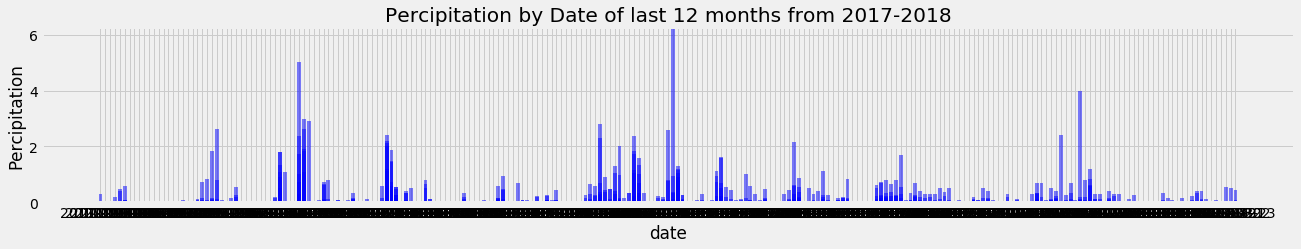

In [104]:


# Set x axis and tick locations
x_axis = dfinal.date
tick_locations = [value for value in x_axis]
# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,3))
plt.bar(x_axis, dfinal.prcp, color='b', alpha=0.5, align="center")
# plt.xticks(tick_locations, df4.date, rotation="vertical")
# Set x and y limits
# plt.xlim(-0.75, len(x_axis))
plt.ylim(0, max(dfinal.prcp)+.02)
#plt.ylim(0, 7)
# Set a Title and labels
plt.title("Percipitation by Date of last 12 months from 2017-2018")
plt.xlabel("date")
plt.ylabel("Percipitation")
#plt.tight_layout()
plt.savefig("../sql_alchemy_flask_challenge/alemiprcp_12months.png")
plt.show()

In [105]:
#----------------------------------------------------------------------
#                   I D E X I N G .  by Date
# Setting the index to Date, requires a new data frame to be "initiated"
# -----------------------------------------------------------------------
dfi = dfs
dfs['date2'] =date
dfi.set_index("date2", inplace=True)
dfi.head()

,id,station,date,prcp,tobs,mmdd
date2,,,,,,
<class 'datetime.date'>,1,USC00519397,2010-01-01,0.08,65.0,None
<class 'datetime.date'>,9008,USC00518838,2010-01-01,0.21,72.0,None
<class 'datetime.date'>,9519,USC00519523,2010-01-01,0.15,75.0,None
<class 'datetime.date'>,12188,USC00519281,2010-01-01,0.15,70.0,None
<class 'datetime.date'>,14960,USC00511918,2010-01-01,0.05,66.0,None


In [106]:
# select rows with date column between a given range, 
#dfi.loc[(dfi['date'] >= 2010-01-01) & (dfi['date'] <= 2010-01-06)]

![precipitation](Images/precipitation.png)

In [107]:
import datetime as datetime

In [288]:
df4 = dfs[:].copy()
df4['date'] = pd.to_datetime(df4['date'])

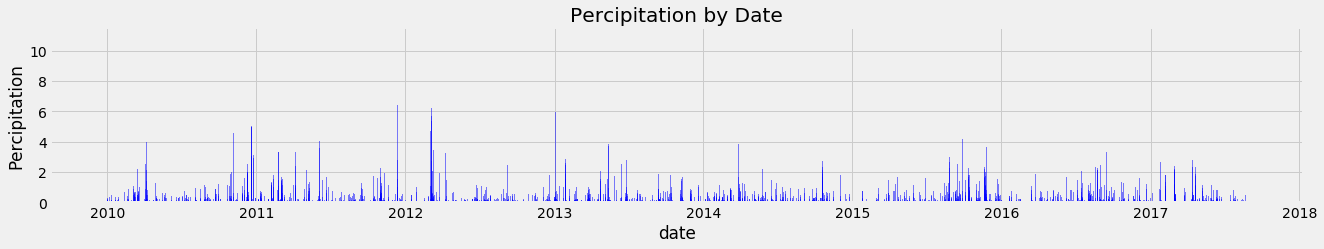

In [163]:


# Set x axis and tick locations
x_axis = df4.date
tick_locations = [value for value in x_axis]
# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,3))
plt.bar(x_axis, df4.prcp, color='b', alpha=0.5, align="center")
# plt.xticks(tick_locations, df4.date, rotation="vertical")
# Set x and y limits
# plt.xlim(-0.75, len(x_axis))
plt.ylim(0, max(df4.prcp)+.02)
#plt.ylim(0, 7)
# Set a Title and labels
plt.title("Percipitation by Date")
plt.xlabel("date")
plt.ylabel("Percipitation")
#plt.tight_layout()
plt.savefig("../sql_alchemy_flask_challenge/alemiprcp.png")
plt.show()

In [289]:
# ----------------------------------------------------------------------------------------------
# Use Pandas to calcualte the summary statistics for the precipitation data
# -------------------------------------------------------------------------------------
# Alemi Querry of 01/20/20
# session.query(func.count(Station.date)).all()
# Latest Date
# session.query(df2.date).order_by(df2.date.desc()).first()
# Query All Records in the the Database

In [108]:

#-------------------------------------------------------------------------------------------
#       We can retrieve data either directly from data base or from data frames.
# .                 Following code retrieves data direct from data base
#-------------------------------------------------------------------------------------------
data = engine.execute("SELECT * FROM station")
for record in data:
    print(record)
# Query Single Record in the the Database
data = engine.execute("SELECT * FROM station WHERE latitude >=50.25;")
for record in data:
    print(record)

(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0)
(2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6)
(3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0)
(4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9)
(5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)
(6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5)
(7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9)
(8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9)
(9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)


![describe](Images/describe.png)

In [109]:
dfinal.describe()
#----------------------------------------------
# could be filtered by say Station 

,id,prcp,tobs
count,1397.000000,1267.000000,1397.000000
mean,10230.584109,0.165927,74.143880
std,5633.823143,0.453913,4.927997
min,2495.000000,0.000000,58.000000
25%,5341.000000,0.000000,71.000000
50%,8962.000000,0.000000,75.000000
75%,14832.000000,0.105000,78.000000
max,19550.000000,6.250000,87.000000


In [291]:
#----------------------------------------------------------------------------------------
# Design a query to show how many stations are available in this dataset?
#----------------------------------------------------------------------------------------
session.query(func.count(Station.id)).all()


[(9)]

In [110]:
from sqlalchemy import inspect

In [111]:
from sqlalchemy.orm import Session
session = Session(bind=engine)

In [112]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [113]:
# Get a list of column names and types in the Station Database (Table)
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])
# --------------------------------------------------------
# .          Columns of Station:
# --------------------------------------------------------

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [114]:
# Get a list of column names and types in the Measurement (Table)
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])
# columns
# --------------------------------------------------------
# .          Columns of Measurement:
# --------------------------------------------------------

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT
mmdd VARCHAR(4)


In [115]:
 #   It is possible to simultaneously querry two sparate data base (Tables), as if they were joined!
session.query(Station.station, Station.name, Station.elevation, Measurement.id, Measurement.tobs).limit(5).all()

[('USC00519397', 'WAIKIKI 717.2, HI US', 3.0, 1, 65.0),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 3.0, 2, 63.0),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 3.0, 3, 74.0),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 3.0, 4, 76.0),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 3.0, 5, 73.0)]

In [116]:
session.query(Measurement.id, Measurement.station , Measurement.date, Measurement.prcp, Measurement.tobs).limit(5).all()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [117]:
# --------------------------------------------------------------------------------------------------
# .  Do not confuse Measurement which is DB Class_Table, with measurement which is a column. "M" vs. "m"
# .  Should have used a better name for Measurement, like MeasureDB or MeasureTable
# --------------------------------------------------------------------------------------------------
session.query(Measurement.date).\
    filter(Measurement.date > '2011-03-01').\
    order_by(Measurement.date).all()

[('2011-03-02'),
 ('2011-03-02'),
 ('2011-03-02'),
 ('2011-03-02'),
 ('2011-03-02'),
 ('2011-03-02'),
 ('2011-03-02'),
 ('2011-03-02'),
 ('2011-03-02'),
 ('2011-03-03'),
 ('2011-03-03'),
 ('2011-03-03'),
 ('2011-03-03'),
 ('2011-03-03'),
 ('2011-03-03'),
 ('2011-03-03'),
 ('2011-03-03'),
 ('2011-03-04'),
 ('2011-03-04'),
 ('2011-03-04'),
 ('2011-03-04'),
 ('2011-03-04'),
 ('2011-03-04'),
 ('2011-03-04'),
 ('2011-03-04'),
 ('2011-03-05'),
 ('2011-03-05'),
 ('2011-03-05'),
 ('2011-03-05'),
 ('2011-03-05'),
 ('2011-03-05'),
 ('2011-03-06'),
 ('2011-03-06'),
 ('2011-03-06'),
 ('2011-03-06'),
 ('2011-03-06'),
 ('2011-03-06'),
 ('2011-03-06'),
 ('2011-03-07'),
 ('2011-03-07'),
 ('2011-03-07'),
 ('2011-03-07'),
 ('2011-03-07'),
 ('2011-03-07'),
 ('2011-03-07'),
 ('2011-03-07'),
 ('2011-03-08'),
 ('2011-03-08'),
 ('2011-03-08'),
 ('2011-03-08'),
 ('2011-03-08'),
 ('2011-03-08'),
 ('2011-03-08'),
 ('2011-03-08'),
 ('2011-03-08'),
 ('2011-03-09'),
 ('2011-03-09'),
 ('2011-03-09'),
 ('2011-03-09'

In [118]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
#                                              'USC00519281', 2772

In [119]:
#-----------------------------------------------------------------------------------------------
#                                 Report #2:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
#                                          and sort the output in descending order.
#                  This is achieved thru a simple (Session)-(querry)-(Group_by)-(Func)-(Order)
#                                                                 Piruz Alemi Jan 11th, 2020
#----------------------------------------------------------------------------------------------
session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [120]:
#------------------------------------------------------------------------------------
#                         Fetchone, FetchMany, Fetchall 
#------------------------------------------------------------------------------------
from sqlalchemy.sql import func
result = conn.execute(select([func.count(Station.id)]))
print (result.fetchall())
#print(result)

[(9,)]


In [121]:
session.query(func.count(Station.id)).all()

[(9)]

In [122]:
# Number of Unique Stations
session.query(Station.id).order_by(Station.id).count()

9

In [123]:
# -------------------------------------------------------------------------------
# Query for all the Stations 
# find the max latitude & Min Longitude and avg elevation
# -------------------------------------------------------------------------------
#                    Sort the result by elevation! 
#                    order_by([COLUMN]): Sorts results by the provided column. 
# -------------------------------------------------------------------------------
sel = [Station.id, Station.station,
#       func.min(Station.latitude), 
#       func.min(Station.longitude),  
       func.avg(Station.elevation)]
Station_Stats = session.query(*sel).\
    group_by(Station.id).\
    order_by(Station.elevation).all()
Station_Stats

[(8, 'USC00511918', 0.9),
 (1, 'USC00519397', 3.0),
 (3, 'USC00514830', 7.0),
 (4, 'USC00517948', 11.9),
 (2, 'USC00513117', 14.6),
 (6, 'USC00519523', 19.5),
 (7, 'USC00519281', 32.9),
 (9, 'USC00516128', 152.4),
 (5, 'USC00518838', 306.6)]

In [124]:
#----------------------------------------------------------------------------------------
#                         Query for all the measurements 
#                         find the total Percipitation for each station
#                         Sort the result by percipitation in Ascending order
#---------------------------------------------------------------------------------------
sel = [Measurement.station, 
       func.sum(Measurement.prcp)]
Measurement_Stats = session.query(*sel).\
    group_by(Measurement.station).\
    order_by(func.sum(Measurement.prcp).asc()).all()
Measurement_Stats

[('USC00517948', 43.44000000000002),
 ('USC00518838', 70.87000000000005),
 ('USC00511918', 92.68000000000006),
 ('USC00519397', 131.62000000000063),
 ('USC00514830', 234.49000000000026),
 ('USC00519523', 295.67999999999944),
 ('USC00513117', 382.61999999999847),
 ('USC00519281', 588.6399999999976),
 ('USC00516128', 1068.0899999999956)]

In [125]:
#----------------------------------------------------------------------------------------------
#                                             Report #3:
#     Using the station id from the previous query, calculate the lowest temperature recorded, 
#     highest temperature recorded, and average temperature of the most active station?
#----------------------------------------------------------------------------------------------
sel = [Measurement.id, Measurement.station, Measurement.date,
       func.max(Measurement.tobs),  
       func.min(Measurement.tobs), 
       func.avg(Measurement.tobs)]
Measurement_Stats = session.query(*sel).\
        filter(Measurement.station == 'USC00519281').\
        group_by(Measurement.station).\
        order_by(func.sum(Measurement.tobs).desc()).all()
Measurement_Stats

[(13294, 'USC00519281', '2013-01-16', 85.0, 54.0, 71.66378066378067)]

In [126]:
#---------------------------------------------------------------------------------------
# .         The Group by of previous table is unecessary, hence this rerun
#---------------------------------------------------------------------------------------

sel = [Measurement.id, Measurement.station, Measurement.date,
       func.max(Measurement.tobs),  
       func.min(Measurement.tobs), 
       func.avg(Measurement.tobs)]
Measurement_Stats = session.query(*sel).\
        filter(Measurement.station == 'USC00519281').\
        order_by(func.sum(Measurement.tobs).desc()).all()
Measurement_Stats

[(13294, 'USC00519281', '2013-01-16', 85.0, 54.0, 71.66378066378067)]

In [127]:
session.query(Measurement.tobs).order_by(Measurement.tobs).first()

(53.0)

In [128]:
# ----------------------------------------------------------------------------------
# -                             B O N U S                  !!!!!!!!!!!!!!!!!!!!!!!!
# ---------------------------------------------------------------------------------
# BONUS: Query and print the number of unique Locations
# Hints: Look into counting and grouping operations in SQLAlchemy
# locations = session.query(Measurement).group_by(Measurement.station).count()
# print(locations)
sel = [Measurement.id, Measurement.station, Measurement.date,
       func.count(Measurement.station)]
Measurement_Stats = session.query(*sel).\
        group_by(Measurement.station).\
        order_by(func.count(Measurement.station).asc()).all()
Measurement_Stats

[(9008, 'USC00518838', '2010-01-01', 511),
 (7636, 'USC00517948', '2010-05-03', 1372),
 (14960, 'USC00511918', '2010-01-01', 1979),
 (5434, 'USC00514830', '2010-03-01', 2202),
 (16939, 'USC00516128', '2010-01-01', 2612),
 (9519, 'USC00519523', '2010-01-01', 2669),
 (2725, 'USC00513117', '2010-01-01', 2709),
 (1, 'USC00519397', '2010-01-01', 2724),
 (12188, 'USC00519281', '2010-01-01', 2772)]

In [129]:
for row in session.query(Measurement.tobs, Measurement.station).limit(5).all():
    print(row)

(65.0, 'USC00519397')
(63.0, 'USC00519397')
(74.0, 'USC00519397')
(76.0, 'USC00519397')
(73.0, 'USC00519397')


In [130]:
# --------------------------------------------------------------------------------
#                              Report #4:
#         Query Measurement Columns and save the query into results
#         Find the Station with the highest Temperature Registered
# --------------------------------------------------------------------------------
results = session.query(Measurement.station, Measurement.date, Measurement.id, Measurement.tobs).\
        filter(Measurement.tobs >= 87).\
    order_by(Measurement.tobs).all()
results

[('USC00519397', '2010-08-23', 213, 87.0),
 ('USC00519397', '2017-05-23', 2636, 87.0),
 ('USC00517948', '2017-07-03', 8991, 87.0),
 ('USC00511918', '2010-09-19', 15210, 87.0)]

In [131]:
#------------------------------------------------------------------------------------
#-                                Report #5
#-                     Report Stations in the last 12 months
#-                  Should point to Dfs, where the data frame was sorted by date
#------------------------------------------------------------------------------------
df2.loc[df2['date'] >= df2['date'].iloc[-365]]

,id,station,date,prcp,tobs,mmdd,scalar_date
2347,2348,USC00519397,2016-08-07,0.39,77.0,None,20160807
2348,2349,USC00519397,2016-08-08,0.02,81.0,None,20160808
2349,2350,USC00519397,2016-08-09,0.00,80.0,None,20160809
2350,2351,USC00519397,2016-08-10,0.00,80.0,None,20160810
2351,2352,USC00519397,2016-08-11,0.00,80.0,None,20160811
...,...,...,...,...,...,...,...
19545,19546,USC00516128,2017-08-19,0.09,71.0,None,20170819
19546,19547,USC00516128,2017-08-20,NaN,78.0,None,20170820
19547,19548,USC00516128,2017-08-21,0.56,76.0,None,20170821
19548,19549,USC00516128,2017-08-22,0.50,76.0,None,20170822


In [132]:
results = session.query(Measurement.date, Measurement.tobs).\
     filter(Measurement.date >= '2016-08-07').\
    group_by(Measurement.tobs).\
    order_by(Measurement.tobs).all()
results[0::]

[('2017-04-30', 58.0),
 ('2017-02-02', 59.0),
 ('2017-01-08', 60.0),
 ('2017-02-02', 61.0),
 ('2016-12-16', 62.0),
 ('2017-01-03', 63.0),
 ('2017-01-06', 64.0),
 ('2017-01-14', 65.0),
 ('2016-12-12', 66.0),
 ('2016-12-06', 67.0),
 ('2016-11-29', 68.0),
 ('2016-12-03', 69.0),
 ('2016-12-09', 70.0),
 ('2016-11-07', 71.0),
 ('2016-11-11', 72.0),
 ('2016-11-26', 73.0),
 ('2016-11-24', 74.0),
 ('2016-09-04', 75.0),
 ('2016-08-21', 76.0),
 ('2016-08-07', 77.0),
 ('2016-08-17', 78.0),
 ('2016-08-12', 79.0),
 ('2016-08-09', 80.0),
 ('2016-08-08', 81.0),
 ('2016-09-23', 82.0),
 ('2017-06-12', 83.0),
 ('2016-08-26', 84.0),
 ('2017-08-19', 85.0),
 ('2017-05-23', 87.0)]

In [133]:
# ----------------------------------------------------------------------------------------
#                                  Report #5:
# ----------------------------------------------------------------------------------------
#               Query Measurement Columns and save the query into results
#                       Towards the data necessary for Mplot
# ----------------------------------------------------------------------------------------
#   a. Designed a query to retrieve the last 12 months of temperature observation data (tobs).
#   b. Filter by the station with the highest number of observations.
#   c. Plot the results as a histogram with `bins=12`
# ----------------------------------------------------------------------------------------
sel = [Measurement.tobs, func.count(Measurement.tobs)]
results2 = session.query(*sel).\
        filter(Measurement.date >= '2016-08-07').\
         filter(Measurement.station == 'USC00519397').\
        group_by(Measurement.tobs).\
        order_by(Measurement.tobs).all()
results2


[(60.0, 1),
 (61.0, 2),
 (62.0, 4),
 (63.0, 4),
 (64.0, 5),
 (65.0, 4),
 (66.0, 8),
 (67.0, 7),
 (68.0, 7),
 (69.0, 10),
 (70.0, 9),
 (71.0, 21),
 (72.0, 17),
 (73.0, 13),
 (74.0, 16),
 (75.0, 21),
 (76.0, 25),
 (77.0, 41),
 (78.0, 37),
 (79.0, 45),
 (80.0, 54),
 (81.0, 21),
 (82.0, 3),
 (83.0, 1),
 (87.0, 1)]

In [134]:
#---------------------------------------------------------------------------------------
# Unpack the `Temp_scores` & Its Freq from results and save into separate lists
#                       That will be used for MPLOT
#---------------------------------------------------------------------------------------
temp_scores = [int(result[0]) for result in results2[::]]
Freq = [result[1] for result in results2[::]]
temp_scores[5]

65

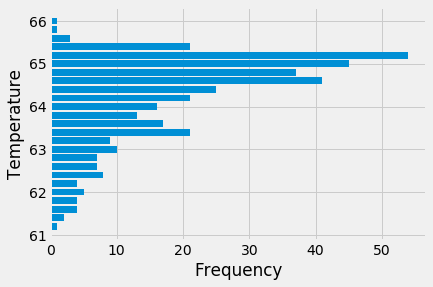

range(1, 26)

In [135]:
# Create a vertical bar chart and plot the Frequency on the y-axis and the `temp score` on the x-axis
# Challenge: Try to plot the scores in descending order on the graph (The largest score is at the top)
fig, ax = plt.subplots()
ypos = range(1, len(Freq)+1)
ax.barh(ypos, Freq[::+1])
#---------------------------
ax.set_xlabel("Frequency")
ax.set_ylabel("Temperature")
#ax.set_yticks(ypos)
ax.set_yticklabels(temp_scores[::+1])
#ax.set_title("Temperature Scores Frequencies")
#fig.tight_layout()
plt.show()
ypos

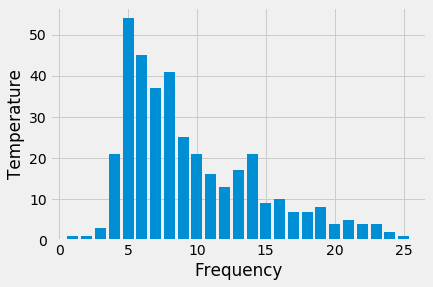

In [136]:
# Create a vertical bar chart and plot the Frequency on the y-axis and the `temp score` on the x-axis
# Challenge: Try to plot the scores in descending order on the graph (The largest score is at the top)
fig, ax = plt.subplots()
ypos = range(1, len(Freq)+1)
ax.bar(ypos, Freq[::-1])
#ax.bar(ypos, temp_scores[::-1])
ax.set_xlabel("Frequency")
ax.set_ylabel("Temperature")
#ax.set_yticks(ypos)
#ax.set_yticklabels(temp_scores[::-1])
#ax.set_title("Temperature Scores Frequencies")
#fig.tight_layout()
plt.show()

In [137]:

# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


![precipitation](Images/station-histogram.png)

In [138]:
# ---------------------------------------------------------------------------------------------------
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """  
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [143]:
#------------------------------------------------------------------------------------------------
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures & more!! for that range of dates
#------------------------------------------------------------------------------------------------
def calc_temps(start_date, end_date):
    
    sel = [ 
       func.min(Measurement.tobs),  
       func.avg(Measurement.tobs), 
       func.max(Measurement.tobs)]
    querried_data = session.query(*sel).\
        filter(Measurement.date >= start_date).\
        filter(Measurement.date <= end_date).\
        order_by(func.sum(Measurement.tobs).desc()).all()

    return(querried_data)

print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [144]:
# .   Two different Sets of Instructions!!!
# From the program:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

# From Gitlab:
#Use the calc_temps function to calculate the min, avg, and max temperatures for your trip using the 
#matching dates from the previous year (i.e., use "2017-01-01" if your trip start date was "2018-01-01").

In [321]:
# .  shifted the year one year back
print(calc_temps('2011-02-28', '2011-03-05'))

[(61.0, 69.75510204081633, 75.0)]


In [150]:
x=(calc_temps('2011-02-28', '2011-03-05'))
avgTemp=x[0][1]
avgTemp

69.75510204081633

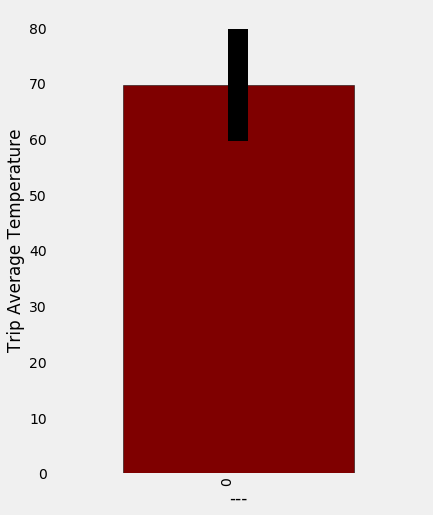

In [151]:
import pandas as pd
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
df = pd.DataFrame({"val":[avgTemp],"error":[10]})
meansum = df["val"]
stdsum = df["error"]
ax.set_xlabel("---")
ax.set_ylabel("Trip Average Temperature")
plot = meansum.plot(kind='bar',yerr=stdsum,colormap='OrRd_r',edgecolor='black',\
                grid=False,figsize=(6,8),ax=ax,position=0.45,\
                    error_kw=dict(ecolor='black',elinewidth=20),width=0.8)
plt.show()

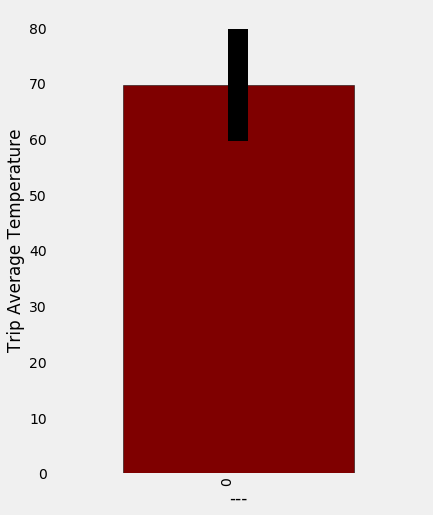

In [375]:
import pandas as pd
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
df = pd.DataFrame({"val":[69.755],"error":[10]})
meansum = df["val"]
stdsum = df["error"]
ax.set_xlabel("---")
ax.set_ylabel("Trip Average Temperature")
plot = meansum.plot(kind='bar',yerr=stdsum,colormap='OrRd_r',edgecolor='black',\
                grid=False,figsize=(6,8),ax=ax,position=0.45,\
                    error_kw=dict(ecolor='black',elinewidth=20),width=0.8)
plt.show()

In [376]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)



In [374]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's
# matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, 
# longitude, and elevation
# This is done for Flask --------------------



## Optional Challenge Assignment

In [152]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)
def daily_normals(date):
    #-----------------------------------------------------------------------------------------
    #Daily Normals.
    #Args:
    #    date (str): A date string in the format '%m-%d'
    #Returns:
    #    A list of tuples containing the daily normals, tmin, tavg, and tmax
    #------------------------------------------------------------------------------------------  
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [157]:
#------------------------------------------------------------------------------------
# .                         M O R E      B O N U S ! 
#------------------------------------------------------------------------------------

def daily_normals(normal_date):
    
    
    sel = [ 
       func.min(Measurement.tobs),  
       func.avg(Measurement.tobs), 
       func.max(Measurement.tobs)]
    querried_data = session.query(*sel).\
        filter(Measurement.date >= '2017' + '-' + normal_date).\
        filter(Measurement.date <= '2020' + '-' + normal_date).\
        order_by(func.sum(Measurement.tobs).desc()).all()

#    for q in querried_data:
#        print(q)
    
    return(querried_data)

print(daily_normals('01-01'))


[(58.0, 74.14387974230493, 87.0)]


In [33]:
#------------------------------------------------------------------------------------------------
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures & more!! for that range of dates
#------------------------------------------------------------------------------------------------
def calc_temps(start_date, end_date):
    
    sel = [ Measurement.date,
       func.min(Measurement.tobs),  
       func.avg(Measurement.tobs), 
       func.max(Measurement.tobs)]
    querried_minmax = session.query(*sel).\
        filter(Measurement.date >= start_date).\
        filter(Measurement.date <= end_date).\
        order_by(func.sum(Measurement.tobs).desc()).all()

    return(querried_minmax)

print(calc_temps('2012-02-28', '2012-03-05'))

[('2012-02-29', 62.0, 69.57142857142857, 74.0)]


In [158]:
# -----------------------------------------------------------------------------------------------
# .        This section of the code can be executed only once!
#--------------------------------------------------------------------------------------------------
#-                                Added a column to SQLITE
#-                          We cannot delete/drop this column as in SQL
#-                          Hence I commented out the code, to avoid getting duplicate column error
#-                          imported DDL in order to issue data definition language (DDL) for all constructs
#-                                                                            Piruz Alemi  Jan 12th, 2020           
#---------------------------------------------------------------------------------------------------
#from sqlalchemy import DDL
#add_column = DDL('ALTER TABLE Measurement ADD COLUMN mmdd VARCHAR(4)')
#engine.execute(add_column)

In [159]:
#

In [162]:
from datetime import date

start = date(year=2016,month=11,day=1)
end = date(year=2016,month=11,day=30)

#s = df2.date
s=dfs.date
# .  -----start, stop position parameters for slice ------
year=s.str.slice(start=0, stop=4, step=1)
month=s.str.slice(start=5, stop=7, step=1)
day = s.str.slice(start=8, stop=12, step=1)
mmdd=month + day

#df2['mmdd_date'] = mmdd.astype(int)
Measurement.mmdd = mmdd
#df2.mmdd_date
#df2
Measurement.mmdd

date2
<class 'datetime.date'>    0101
<class 'datetime.date'>    0101
<class 'datetime.date'>    0101
<class 'datetime.date'>    0101
<class 'datetime.date'>    0101
                           ... 
<class 'datetime.date'>    0822
<class 'datetime.date'>    0823
<class 'datetime.date'>    0823
<class 'datetime.date'>    0823
<class 'datetime.date'>    0823
Name: date, Length: 19550, dtype: object

In [163]:
from sqlalchemy import select

#q1 = select((Measurement.date.start, Measurement.date.end), Measurement.date.start==<date>)

In [164]:
# ------------------------------------------------------------------------------------------------
#
#                                   
# ------------------------------------------------------------------------------------------------
#def daily_normals(normal_date):
#        
#    sel = [ 
#       func.min(Measurement.tobs),  
#       func.avg(Measurement.tobs), 
#       func.max(Measurement.tobs)]
#    querried_data = session.query(*sel).\
#        filter(Measurement.mmdd == normal_date).\
#        order_by(func.sum(Measurement.tobs).desc()).all()
#
#    return(querried_data)
#
#print(daily_normals(12-02))

In [165]:
# -----------------------------------------------------------------------------------------------------
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`
# Set the start and end date of the trip
# Use the start and end date to create a range of dates
# Strip off the year and save a list of %m-%d strings
# Loop through the list of %m-%d strings and calculate the normals for each date
# -----------------------------------------------------------------------------------------------------
# This section of the bonus is done via FLASK! See the querry in Flask as well as in this program just below
# -             Filterd by a date range
# ------------------------------------------------------------------------------------------------------


<IPython.core.display.Javascript object>


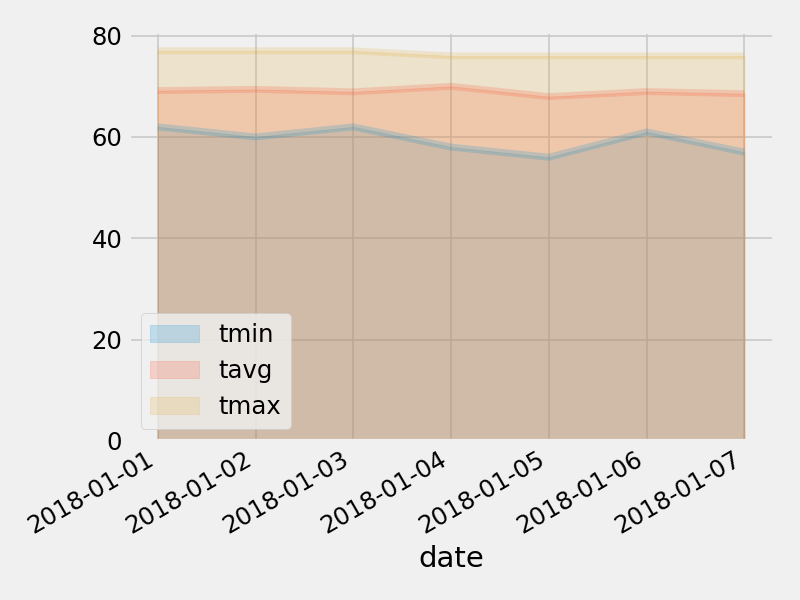

In [23]:
# Plot the daily normals as an area plot with `stacked=False`


In [169]:
# -------------------------------------------------------------------------------------------------------
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
# This coversion of Table Values to Data Frames was done before! similarly:
# Though the concept of Trip dates remains alien! What trip?
# ----------------------------------------------------------------------------------------------------------

def calc_temps(start_date, end_date):
    
    sel = [ Measurement.date,
       func.min(Measurement.tobs),  
       func.avg(Measurement.tobs), 
       func.max(Measurement.tobs)]
    querried_minmax = session.query(*sel).\
        filter(Measurement.date >= start_date).\
        filter(Measurement.date <= end_date).\
        order_by(func.sum(Measurement.tobs).desc()).all()

    return(querried_minmax)

print(calc_temps('2012-02-28', '2012-03-05'))

def trip_dates(start_date, end_date):
    # Create our session (link) from Python to the DB
    #session = Session(engine)

    # Return a list of stats including date, tmin, tavg, tmax
    # These results were queried before, so no need to querry again!
    #results = session.query(Measurement.date, Measurement.tobs).all()
    #results = querried_minmax
    sel = [ Measurement.date,
       func.min(Measurement.tobs),  
       func.avg(Measurement.tobs), 
       func.max(Measurement.tobs)]
    querried_minmax = session.query(*sel).\
        filter(Measurement.date >= start_date).\
        filter(Measurement.date <= end_date).\
        order_by(func.sum(Measurement.tobs).desc()).all()

    #session.close()
    # --------------------------------------------------------------------------------------
    # Create a dictionary from the row data of queried data and append to a list of trip_dates
    # Create a Pandas Data Frame out of Dictionary (next line of codes - commented out)
    # ----------------------------------------------------------------------------------------
    all_stats = []
    for date, tmin, tavg, tmax in querried_minmax:
        stat_dict = {}
        stat_dict["date"] = date
        stat_dict["tmin"] = tmin
        stat_dict["tavg"] = tavg
        stat_dict["tmax"] = tmax
        all_stats.append(stat_dict)
    
    return all_stats

print(trip_dates('2012-02-28','2013-03-05'))
                

[('2012-02-29', 62.0, 69.57142857142857, 74.0)]
[{'date': '2012-07-26', 'tmin': 54.0, 'tavg': 72.20676691729324, 'tmax': 86.0}]


In [58]:
#trip_dates('2012-02-28','2013-03-05')
#pd.DataFrame.from_dict(stat_dict, orient='index', columns=['date', 'tmin', 'tavg', 'tmax'])

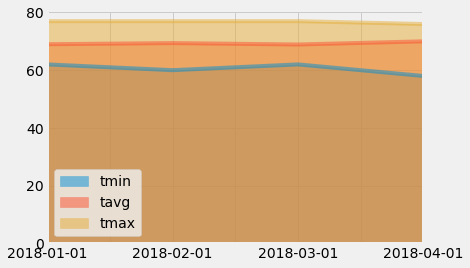

In [184]:
#--------------------------------------------------------------------
# An overlapped area plot
# for a pandas DataFrame
# import pandas as pd
# import matplotlib.pyplot as plot
# Peak Temperature data for two cities
#--------------------------------------------------------------------
tempData    = {"tmin":[62, 60, 62, 58],
               "tavg":[69, 69.39, 68.90, 70],
               "tmax":[77, 77, 77, 76]};             
date     = ("2018-01-01", "2018-02-01", "2018-03-01", "2018-04-01");
#--------------------------------------------------------------------
#                     Create a DataFrame instance
#--------------------------------------------------------------------
dataFrame   = pd.DataFrame(tempData, index=date);
#                Draw an area plot for the DataFrame data & Do not Stack them
dataFrame.plot(kind='area', stacked=False)
#plot.show(block=True);

In [185]:
results = session.query(Measurement.date, Measurement.prcp).all()
     
    # -------------------------------------------------------------------------------
    # Create a dictionary from date & prcp and append to a list of all_dates
    # -------------------------------------------------------------------------------
all_measures = []
for date, prcp in results:
    measure_dict = {} 
    measure_dict["date"] = date
    measure_dict["prcp"] = prcp
    all_measures.append(measure_dict)
    
all_measures[0]

{'date': '2010-01-01', 'prcp': 0.08}

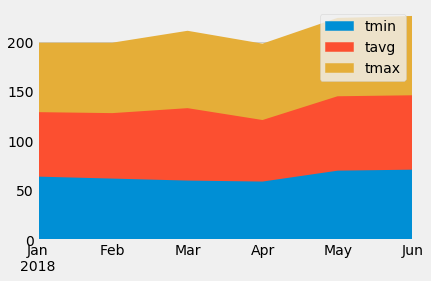

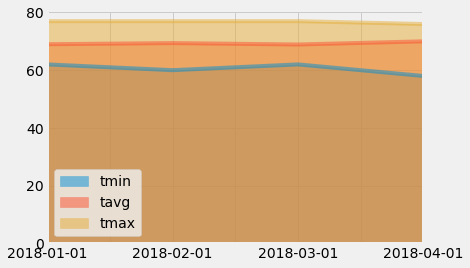

In [186]:
df = pd.DataFrame({
    'tmin': [62, 60, 58, 57, 68, 69],
    'tavg': [65, 66, 73, 62, 75, 75],
    'tmax': [70, 71, 78, 77, 79, 80],
    }, index=pd.date_range(start='2018/01/01', end='2018/07/01',
                         freq='M'))
ax = df.plot.area()
dataFrame.plot(kind='area', stacked=False)